In [2]:
import cv2 as cv
import numpy as np
import math

In [3]:
#extracting image
cap = cv.VideoCapture("C:\\Users\\hp\\Desktop\\Level 2.mp4")
isTrue, frame = cap.read()
print(frame.shape)
cv.imwrite("extracted.png", frame)

(540, 960, 3)


True

(540, 960, 3)

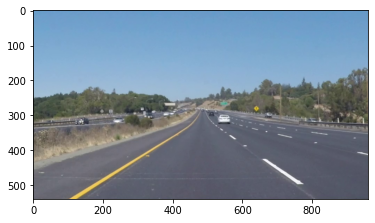

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plotimgb = mpimg.imread('extracted.png')
plt.imshow(plotimgb) # note that our image plots in the 4th quadrant
plotimgb.shape

In [40]:
def place_lane(img):
    mask = np.zeros_like(img)
    coordinates = np.array([[(100,img.shape[0]),(420,340),(550,340),(870,img.shape[0])]],np.int32)
    cv.fillPoly(mask,coordinates,(0,255,0))
    masked_img = cv.bitwise_or(img,mask)
    return masked_img

In [41]:
def crop_lane(img):
    mask = np.zeros_like(img)
    coordinates = np.array([[(100,img.shape[0]),(420,340),(550,340),(870,img.shape[0])]],np.int32)
    cv.fillPoly(mask,coordinates,255)
    masked_img = cv.bitwise_and(img,mask)
    return masked_img

In [42]:
def make_mask(img,houghLines):
    mask = np.zeros_like(img)
    left_line_x = []
    left_line_y = []
    right_line_x = []
    right_line_y = []
    try:
        for line in houghLines:
            for x1, y1, x2, y2 in line:
                slope = (y2 - y1) / (x2 - x1) # <-- Calculating the slope.
                if math.fabs(slope) < 0.55: # <-- Only consider extreme slope
                    continue
                if slope <= 0: # <-- If the slope is negative, left group.
                    left_line_x.extend([x1, x2])
                    left_line_y.extend([y1, y2])
                else: # <-- Otherwise, right group.
                    right_line_x.extend([x1, x2])
                    right_line_y.extend([y1, y2])
    except TypeError:
        print("hello3")
        pass
    if(len(left_line_x)!=0 and len(left_line_y)!=0 and len(right_line_x)!=0 and len(right_line_x)!=0) :
        print("hello1")
        x1 = min(left_line_x)
        y1 = max(left_line_y)
        x2 = max(left_line_x)
        y2 = min(left_line_y)
        x3 = min(right_line_x)
        y3 = min(right_line_y)
        x4 = 865
        y4 = 540
        coordinates = np.array([[(x1,y1),(x2,y2),(x3,y3),(x4,y4)]],np.int32)
        cv.fillPoly(mask,coordinates,(0,255,0))
        masked_img = cv.bitwise_or(img,mask)
    else:
        print("hello2")
        masked_img = place_lane(img)
    return masked_img

In [44]:
cap = cv.VideoCapture("C:\\Users\\hp\\Desktop\\Level 2.mp4")
output = cv.VideoWriter("_MITvideo_vid2.mp4",cv.VideoWriter_fourcc('M', 'P', '4', 'V'), 30, (960, 540))
while True:
    isTrue, frame = cap.read()
    if not isTrue:
        cv.destroyAllWindows()
        print("Cant receive frame end.... quiting")
        break
    # cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    kernel = 5
    blur = cv.GaussianBlur(frame,(kernel,kernel),0)
    canny = cv.Canny(blur,50,150)
    cropped = crop_lane(canny)
    houghLines = cv.HoughLinesP(cropped,rho=6,theta=np.pi / 60,threshold=160,lines=np.array([]),minLineLength=40,maxLineGap=25)
    lined_img = make_mask(frame,houghLines)
    output.write(lined_img)
    
    cv.imshow('New',lined_img)
    if cv.waitKey(20)==ord('q'):
        cv.destroyAllWindows()
        break

hello1
hello1
hello1
hello1
hello1
hello2
hello2
hello2
hello2
hello2
hello2
hello1
hello1
hello1
hello1
hello1
hello1
hello2
hello2
hello2
hello2
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello2
hello2
hello2
hello2
hello2
hello1
hello1
hello1
hello1
hello1
hello1
hello2
hello2
hello2
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello2
hello2
hello2
hello2
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello2
hello2
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello2
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello2
hello2
hello2
hello2
hello1
hello1
hello1
hello2
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1